In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
work_order_df = pd.read_csv('/content/drive/MyDrive/IWC_Work_Orders_Extract.csv')

<ipython-input-2-3de65718b276>:1: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  work_order_df = pd.read_csv('/content/drive/MyDrive/IWC_Work_Orders_Extract.csv')


In [3]:
print(work_order_df.head())

    ORDER_ID PLANT_ID PRODUCTION_LOCATION EXECUTION_START_DATE  \
0  705642457     G812                ROMA           2024-05-04   
1  704191697     G812                ROMA           2022-09-13   
2  704466547     G812                ROMA           2022-12-21   
3  703834477     G812                ROMA           2022-07-04   
4  704661125     G291               MONZA           2023-03-15   

  EXECUTION_FINISH_DATE ACTUAL_START_TIME ACTUAL_FINISH_TIME  \
0            2024-05-12      06:00:00.000       23:04:08.000   
1            2022-09-13      06:00:00.000       17:17:24.000   
2            2022-12-21      07:00:00.000       07:00:00.000   
3            2022-07-04      06:00:00.000       06:00:00.000   
4            2023-03-15      07:00:00.000       07:00:00.000   

   ACTUAL_WORK_IN_MINUTES MAINTENANCE_PLAN  MAINTENANCE_ITEM  ...  \
0                   390.0              NaN               NaN  ...   
1                   420.0              NaN               NaN  ...   
2          

In [4]:
print(work_order_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

In [5]:
work_order_df_copy = work_order_df.copy()

In [43]:
work_order_df['PLANT_ID'].unique()
#work_order_df['PRODUCTION_LOCATION'].value_counts()
#work_order_df[work_order_df['Duration_in_days']==205]

array(['G812', 'G291', 'G816', 'G811', 'G221', 'G261'], dtype=object)

In [6]:
work_order_df['MAINTENANCE_TYPE_DESCRIPTION'].value_counts()

,count
MAINTENANCE_TYPE_DESCRIPTION,
Preventive Maintenance Order,151533
Corrective Maintenance Order,134074
Administrative Order,6161
Capital Order,22
Breakdown Maintenance Order,5


In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = work_order_df.copy()

# Convert date and time columns to datetime
df_encoded['EXECUTION_START_DATE'] = pd.to_datetime(df_encoded['EXECUTION_START_DATE'])
df_encoded['EXECUTION_FINISH_DATE'] = pd.to_datetime(df_encoded['EXECUTION_FINISH_DATE'])
df_encoded['ACTUAL_START_TIME'] = pd.to_datetime(df_encoded['ACTUAL_START_TIME'])
df_encoded['ACTUAL_FINISH_TIME'] = pd.to_datetime(df_encoded['ACTUAL_FINISH_TIME'])

# Convert datetime columns to numeric (e.g., number of seconds since the Unix epoch)
df_encoded['EXECUTION_START_DATE'] = df_encoded['EXECUTION_START_DATE'].astype('int64') // 1e9
df_encoded['EXECUTION_FINISH_DATE'] = df_encoded['EXECUTION_FINISH_DATE'].astype('int64') // 1e9
df_encoded['ACTUAL_START_TIME'] = df_encoded['ACTUAL_START_TIME'].astype('int64') // 1e9
df_encoded['ACTUAL_FINISH_TIME'] = df_encoded['ACTUAL_FINISH_TIME'].astype('int64') // 1e9

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include='object').columns

# Label encode all categorical columns
for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))

# Fill missing values in numerical columns (if any)
df_encoded.fillna(0, inplace=True)

# Define X and y
X = df_encoded.drop('ACTUAL_WORK_IN_MINUTES', axis=1)
y = df_encoded['ACTUAL_WORK_IN_MINUTES']

# Train Random Forest model
model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importances)


<ipython-input-6-0af5c80e56cb>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_encoded['ACTUAL_START_TIME'] = pd.to_datetime(df_encoded['ACTUAL_START_TIME'])
<ipython-input-6-0af5c80e56cb>:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_encoded['ACTUAL_FINISH_TIME'] = pd.to_datetime(df_encoded['ACTUAL_FINISH_TIME'])


                                   Importance
EXECUTION_FINISH_DATE            4.486650e-01
EXECUTION_START_DATE             2.721242e-01
ACTUAL_FINISH_TIME               1.319405e-01
ORDER_ID                         5.640246e-02
ACTUAL_START_TIME                4.844359e-02
PRODUCTION_LOCATION              1.724893e-02
FUNCTIONAL_LOC                   6.181676e-03
PLANT_ID                         5.947212e-03
FUNCTIONAL_AREA_NODE_1_MODIFIED  3.794051e-03
MAINTENANCE_TYPE_DESCRIPTION     3.367431e-03
ORDER_DESCRIPTION                3.199941e-03
MAINTENANCE_ACTIVITY_TYPE        1.692065e-03
EQUIPMENT_ID                     5.020412e-04
MAINTENANCE_ITEM                 3.486659e-04
FUNCTIONAL_AREA_NODE_4_MODIFIED  5.325139e-05
MAINTENANCE_PLAN                 3.782005e-05
FUNCTIONAL_AREA_NODE_3_MODIFIED  2.039056e-05
EQUIP_START_UP_DATE              1.026679e-05
FUNCTIONAL_AREA_NODE_2_MODIFIED  7.973273e-06
EQUIPMENT_DESC                   6.044706e-06
EQUIP_CAT_DESC                   3

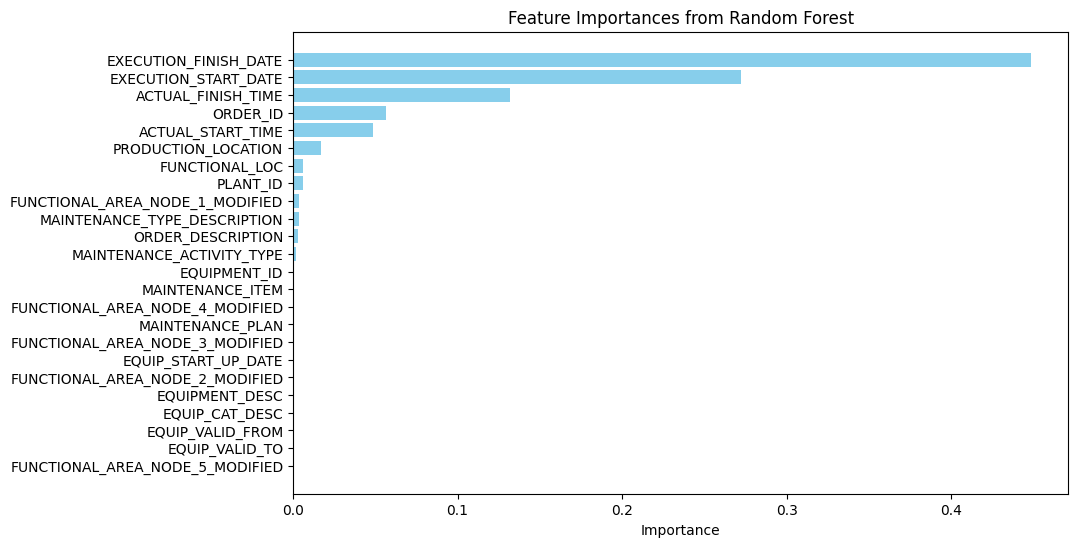

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.349252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3115
[LightGBM] [Info] Number of data points in the train set: 1427264, number of used features: 24
[LightGBM] [Info] Start training from score 88.629684
                                 Importance
ACTUAL_FINISH_TIME                      390
ACTUAL_START_TIME                       357
ORDER_ID                                230
EXECUTION_START_DATE                    205
EXECUTION_FINISH_DATE                   184
PLANT_ID                                 51
MAINTENANCE_ACTIVITY_TYPE                14
MAINTENANCE_TYPE_DESCRIPTION             14
FUNCTIONAL_LOC                           12
MAINTENANCE_PLAN                         11
PRODUCTION_LOCATION                      10
MAINTENANCE_ITEM                          6
ORDER_DESCRIPTION                         5
EQUIPMENT_ID                           

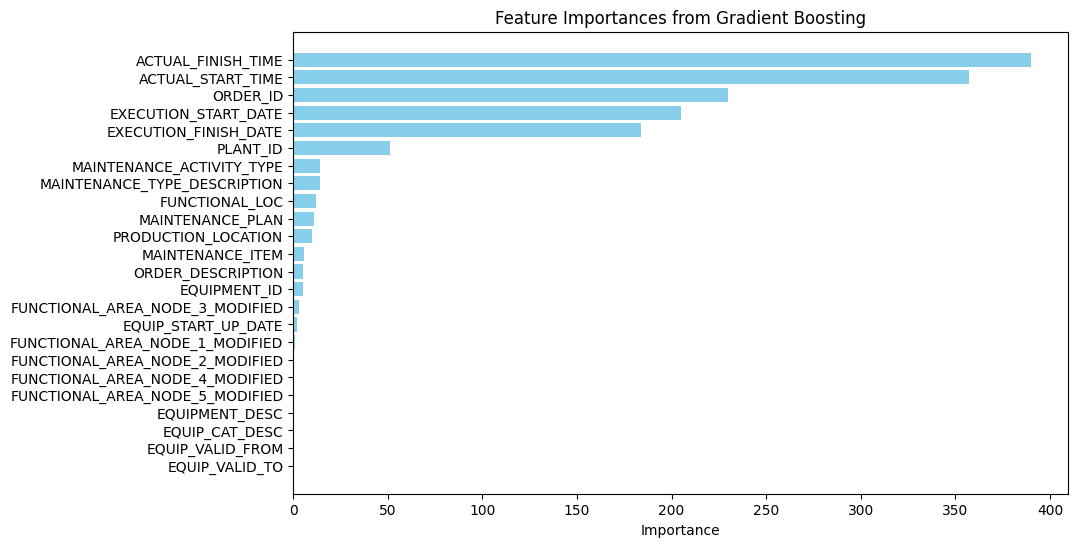

In [10]:
import lightgbm as lgb
# Train LightGBM model
model = lgb.LGBMRegressor(n_estimators=50, max_depth=10, random_state=42)
model.fit(X, y)

lgb_feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(lgb_feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(lgb_feature_importances.index, lgb_feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Gradient Boosting')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

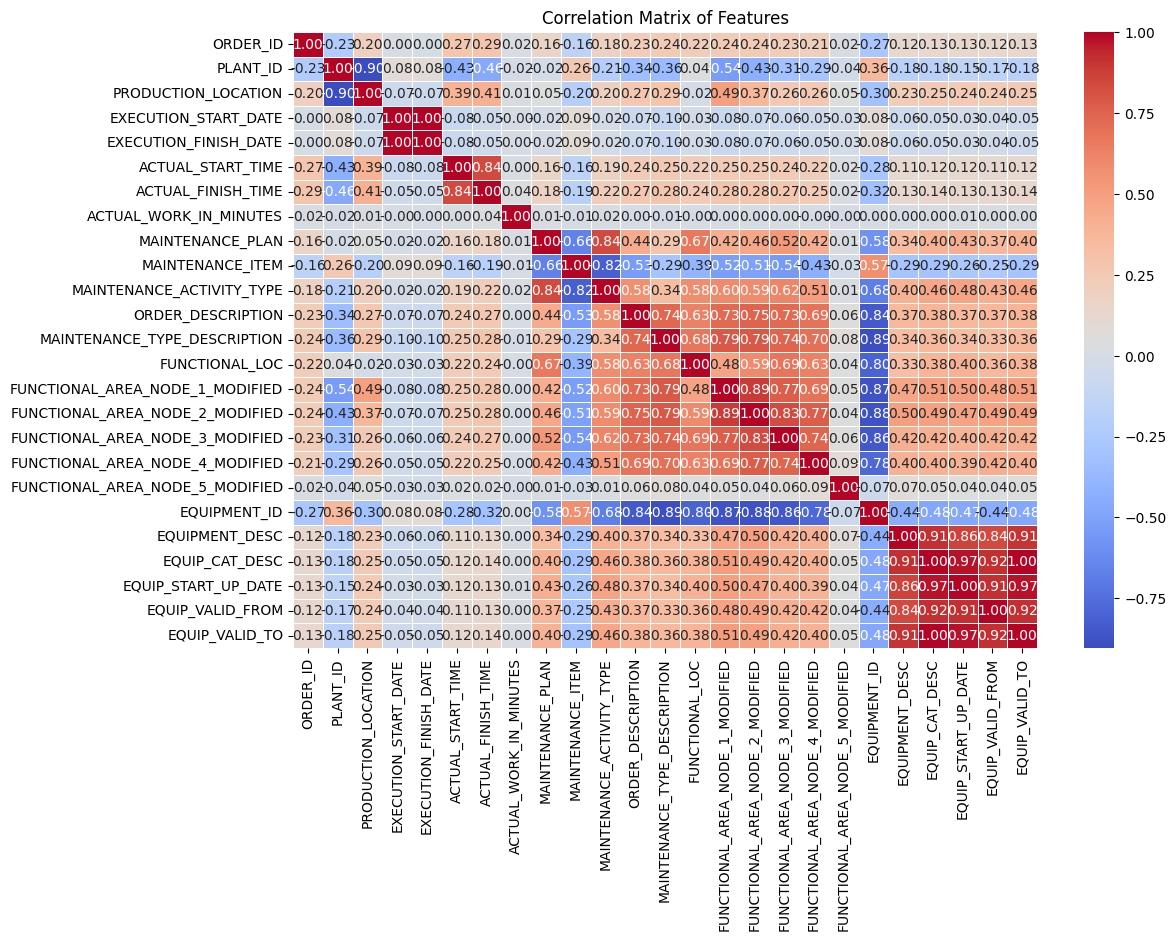

In [11]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [13]:
# Ensure date columns are in datetime format
date_list=['EXECUTION_START_DATE','EXECUTION_FINISH_DATE','EQUIP_START_UP_DATE','EQUIP_VALID_FROM']
for date_col in date_list:
    work_order_df[date_col] = pd.to_datetime(work_order_df[date_col])  # Replace with the correct column name


In [14]:
# Convert actual work minutes to hours
work_order_df['ACTUAL_WORK_HOURS'] = work_order_df['ACTUAL_WORK_IN_MINUTES'] / 60
work_order_df['DURATION_IN_DAYS'] = (work_order_df['EXECUTION_FINISH_DATE'] - work_order_df['EXECUTION_START_DATE']).dt.days

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


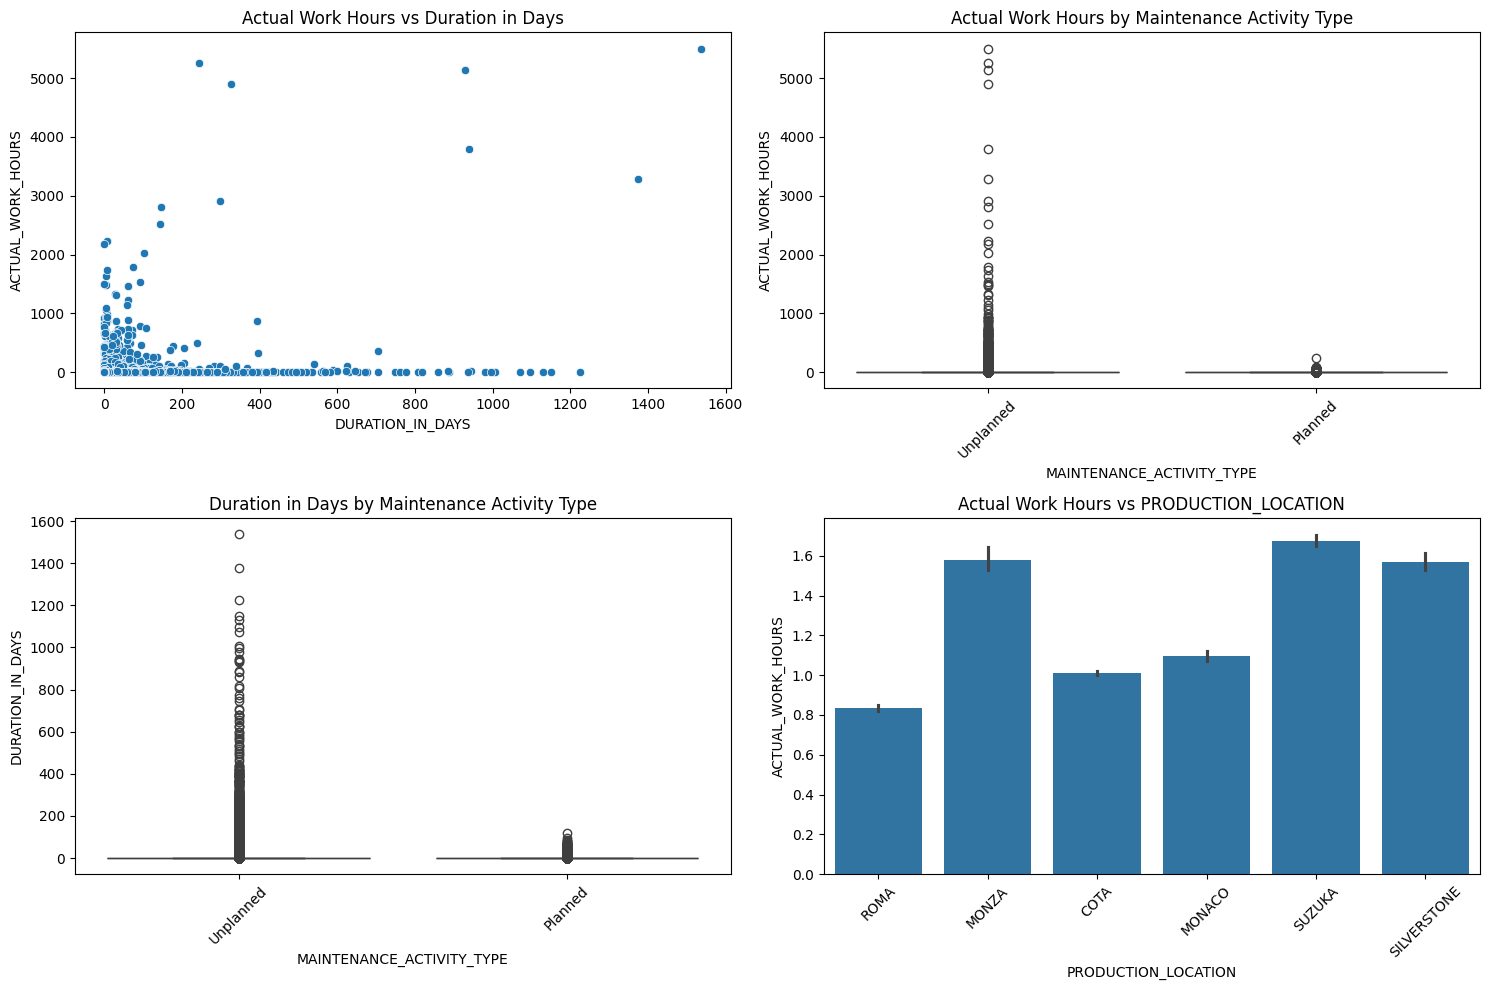

In [24]:
plt.figure(figsize=(15, 10))

# 1. Scatter Plot: ACTUAL_WORK_HOURS vs. DURATION_IN_DAYS
plt.subplot(2, 2, 1)
sns.scatterplot(data=work_order_df, x='DURATION_IN_DAYS', y='ACTUAL_WORK_HOURS')
plt.title('Actual Work Hours vs Duration in Days')

# 2. Box Plot: ACTUAL_WORK_HOURS for different MAINTENANCE_ACTIVITY_TYPE
plt.subplot(2, 2, 2)
sns.boxplot(data=work_order_df, x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_HOURS')
plt.xticks(rotation=45)
plt.title('Actual Work Hours by Maintenance Activity Type')

# 3. Box Plot: DURATION_IN_DAYS for different MAINTENANCE_ACTIVITY_TYPE
plt.subplot(2, 2, 3)
sns.boxplot(data=work_order_df, x='MAINTENANCE_ACTIVITY_TYPE', y='DURATION_IN_DAYS')
plt.xticks(rotation=45)
plt.title('Duration in Days by Maintenance Activity Type')

# 4. Scatter Plot: Location vs. ACTUAL_WORK_HOURS
plt.subplot(2, 2, 4)
sns.barplot(data=work_order_df, x='PRODUCTION_LOCATION', y='ACTUAL_WORK_HOURS')
plt.xticks(rotation=45)
plt.title('Actual Work Hours vs PRODUCTION_LOCATION')



# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

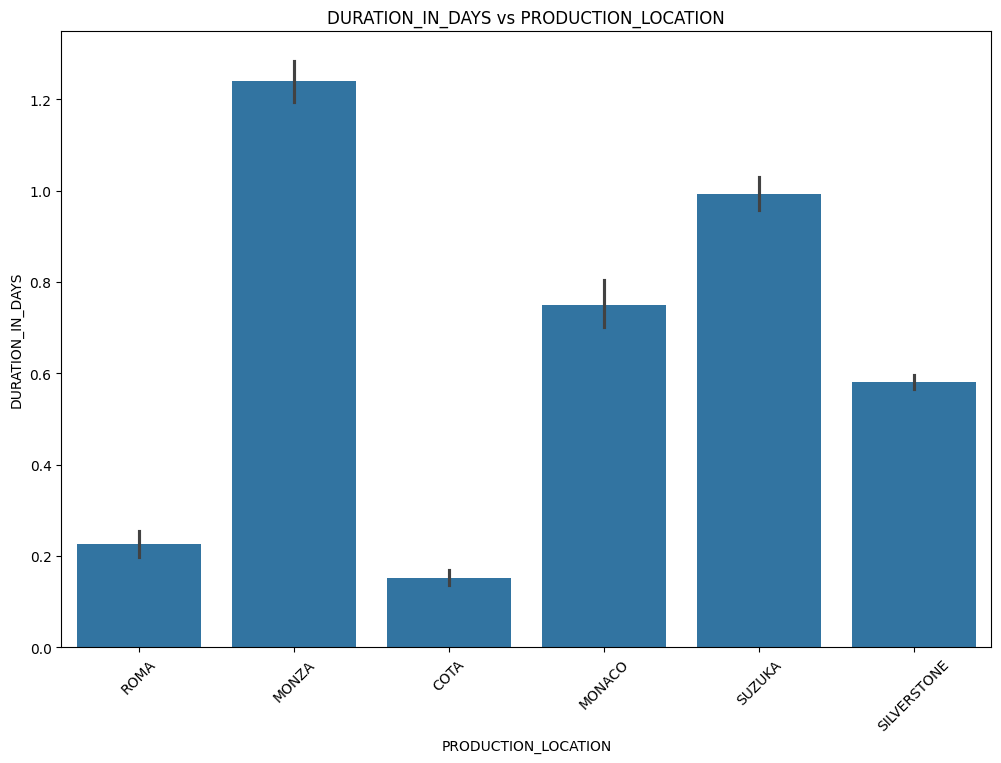

In [23]:
# 5. Scatter Plot: Location vs. DURATION_IN_DAYS
plt.figure(figsize=(12, 8))
sns.barplot(data=work_order_df, x='PRODUCTION_LOCATION', y='DURATION_IN_DAYS')
plt.xticks(rotation=45)
plt.title('DURATION_IN_DAYS vs PRODUCTION_LOCATION')
plt.show()

In [27]:
#work_order_df['PRODUCTION_LOCATION'].value_counts()
work_order_df[work_order_df['DURATION_IN_DAYS']>=205]

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO,ACTUAL_WORK_HOURS,DURATION_IN_DAYS
10825,701131018,G816,COTA,2018-01-14,2019-01-16,07:00:00.000,07:00:00.000,210.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,3.500000,367
14385,200000106112,G261,SILVERSTONE,2013-08-19,2016-08-19,14:48:00.000,22:54:00.000,66.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,1.100000,1096
14644,600410875,G291,MONZA,2018-03-07,2018-11-27,06:08:37.000,17:51:46.000,627.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,10.450000,265
17343,901369536,G261,SILVERSTONE,2021-10-12,2022-08-03,18:35:06.000,21:23:00.000,17.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.283333,295
20067,612241134,G221,SUZUKA,2022-03-03,2023-08-17,07:55:27.000,15:41:27.000,11.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.190000,532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404279,200003954459,G291,MONZA,2023-08-03,2024-04-24,09:12:00.000,22:27:00.000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.000000,265
1408200,600323322,G221,SUZUKA,2018-01-19,2020-08-12,11:09:41.000,15:37:35.000,150.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2.500000,936
1409428,600307137,G221,SUZUKA,2017-11-20,2020-08-12,09:04:31.000,21:07:24.000,99.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,1.650000,996
1416731,600537725,G291,MONZA,2018-07-10,2019-07-01,17:48:42.000,21:12:42.000,2.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,0.040000,356


In [ ]:
time_list=['ACTUAL_START_TIME','ACTUAL_FINISH_TIME']
for time_col in time_list:
    work_order_df[time_col] = pd.to_datetime(work_order_df[time_col], format='%H:%M:%S.%f').dt.time